In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_read = "data/city_data.csv"
ride_read = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_read)
ride_df = pd.read_csv(ride_read)
# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, how='outer', on='city')

# Display the data table for preview
combined_df = combined_df[['city', 'date', 'fare', 'ride_id', 'driver_count', 'type']]
combined_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban
5,Richardfort,2018-04-21 03:44:04,9.54,3698147103219,38,Urban
6,Richardfort,2018-02-03 00:14:26,29.04,4982665519010,38,Urban
7,Richardfort,2018-02-08 15:50:12,16.55,2270463070874,38,Urban
8,Richardfort,2018-04-03 15:07:34,40.77,9496210735824,38,Urban
9,Richardfort,2018-02-19 14:09:20,27.11,8690324801449,38,Urban


## Bubble Plot of Ride Sharing Data

C:\Users\psaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\psaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\psaha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

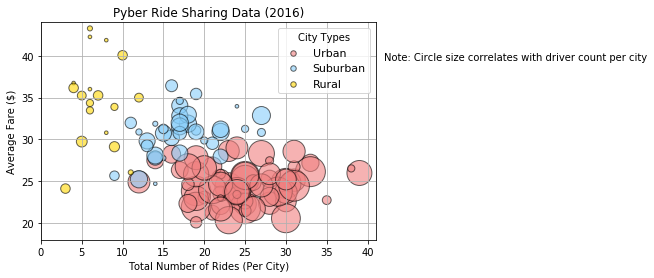

<Figure size 432x288 with 0 Axes>

In [6]:
# Obtain the x and y coordinates for each of the three city types
urban_df = combined_df.loc[combined_df["type"] == "Urban"]
suburban_df = combined_df.loc[combined_df["type"] == "Suburban"]
rural_df = combined_df.loc[combined_df["type"] == "Rural"]

#urban_df_rides = len(urban_df["type"].tolist())

urban_df["Total Number of Rides"] = urban_df.groupby('city')[["city"]].transform("count")
urban_df["Total Cost of Rides per City"] = urban_df.groupby('city')[["fare"]].transform("sum")
urban_df["Average Cost of rides per City"] = urban_df["Total Cost of Rides per City"]/urban_df["Total Number of Rides"]
urban_df_dropped = urban_df.drop_duplicates("city")
#urban_df.head()

suburban_df["Total Number of Rides"] = suburban_df.groupby('city')[["city"]].transform("count")
suburban_df["Total Cost of Rides per City"] = suburban_df.groupby('city')[["fare"]].transform("sum")
suburban_df["Average Cost of rides per City"] = suburban_df["Total Cost of Rides per City"]/suburban_df["Total Number of Rides"]
suburban_df_dropped = suburban_df.drop_duplicates("city")
#suburban_df.head()

rural_df["Total Number of Rides"] = rural_df.groupby('city')[["city"]].transform("count")
rural_df["Total Cost of Rides per City"] = rural_df.groupby('city')[["fare"]].transform("sum")
rural_df["Average Cost of rides per City"] = rural_df["Total Cost of Rides per City"]/rural_df["Total Number of Rides"]
rural_df_dropped = rural_df.drop_duplicates("city")
#rural_df.head()

#grouped_suburban = suburban_df.groupby(['city'])
#grouped_rural = rural_df.groupby(['city'])

# Build the scatter plots for each city types
#fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
#fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

ax1=urban_df_dropped.plot(kind="scatter", x="Total Number of Rides", y="Average Cost of rides per City", label="Urban", marker='o', edgecolors='black', alpha=0.6, s=(urban_df_dropped['driver_count']*13), grid=True, c='lightcoral', figsize=(6,4))
ax2=suburban_df_dropped.plot(kind="scatter", x="Total Number of Rides", y="Average Cost of rides per City",label="Suburban", marker='o', edgecolors='black', alpha=0.6, s=(suburban_df_dropped['driver_count']*13), grid=True, c='lightskyblue', figsize=(6,4), ax=ax1)
ax3=rural_df_dropped.plot(kind="scatter", x="Total Number of Rides", y="Average Cost of rides per City", label="Rural",  marker='o', edgecolors='black', alpha=0.6, s=(rural_df_dropped['driver_count']*13), grid=True, c='gold', figsize=(6,4), ax=ax1)


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.xlim(0,41)
plt.ylim(18,44)
lgnd=plt.legend(loc='upper right', ncol=1, fontsize=11, title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
textstr='Note: Circle size correlates with driver count per city'
#plt.text(-.05, .04, textstr, fontsize=14, transform=plt.gcf().transFigure)
plt.gcf().text(.92, .75, textstr,fontsize=10)
plt.show(ax1==ax2==ax3)
plt.savefig("../Pyber/pyber_scatter2.png", dpi=None, facecolor='w', edgecolor='w', orientation='portrait', papertype=None, format=None, transparent=False, bbox_inches=None, pad_inches=0.1, frameon=None, metadata=None)
#plt.savefig("../Images/18-final-plot.png")

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


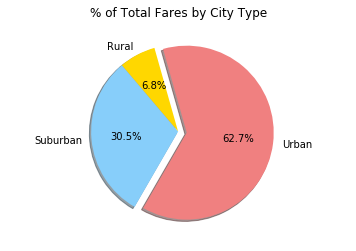

In [11]:
total_sum_fares = combined_df['fare'].sum()
urban_sum_fares = urban_df['fare'].sum()
suburban_sum_fares = suburban_df['fare'].sum()
rural_sum_fares = rural_df['fare'].sum()

average_urban_fares = urban_sum_fares / total_sum_fares
average_suburban_fares = suburban_sum_fares / total_sum_fares 
average_rural_fares = rural_sum_fares / total_sum_fares
labels=["Urban", "Rural", "Suburban"]
sizes=[average_urban_fares, average_rural_fares, average_suburban_fares]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.savefig("../Pyber/Total_fares.png")


## Total Fares by City Type

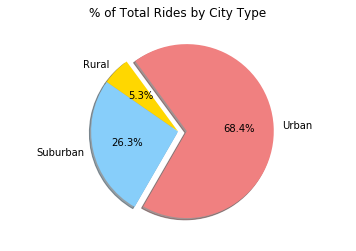

In [7]:
# Calculate Type Percents
total_sum = len(combined_df['fare'].tolist())
urban_sum = len(urban_df['fare'].tolist())
suburban_sum = len(suburban_df['fare'].tolist())
rural_sum = len(rural_df['fare'].tolist())


average_urban = urban_sum / total_sum 
average_suburban = suburban_sum / total_sum 
average_rural = rural_sum / total_sum 
labels=["Urban", "Rural", "Suburban"]
sizes=[average_urban, average_rural, average_suburban]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.savefig("../Pyber/Total_Rides.png")
# Build Pie Chart

# Save Figure


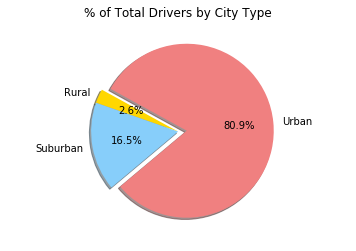

In [9]:
urban_drivers = urban_df_dropped["driver_count"].sum()
suburban_drivers = suburban_df_dropped["driver_count"].sum()
rural_drivers = rural_df_dropped["driver_count"].sum()
total_drivers = urban_drivers + suburban_drivers + rural_drivers 

urban_drivers =  urban_drivers / total_drivers
suburban_drivers = suburban_drivers / total_drivers
rural_drivers = rural_drivers / total_drivers
labels=["Urban", "Rural", "Suburban"]
sizes=[urban_drivers, rural_drivers, suburban_drivers]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.savefig("../Pyber/Total_Drivers.png")

## Total Rides by City Type

In [9]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [11]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


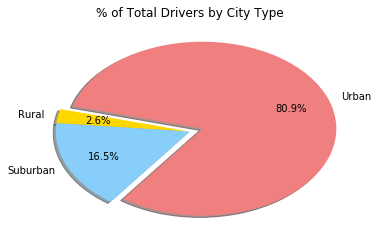

In [6]:
# Show Figure
plt.show()